In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [35]:
#Create a Model Class that inherits a nn.Module
class Model(nn.Module):
  # Input Layer --> Features of the flowers
  # Hidden Layer1 (Number of neurons)
  # Hidden Layer 2
  # Output Layer --> Class of Iris flower

  def __init__(self, in_features = 4, h1 = 8, h2 = 10, out_features = 3):
    super().__init__() #Instantiating
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [36]:
# Picking manual seed for Randomization
torch.manual_seed(42)
# Creating an instace of model
model = Model()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [39]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [40]:
# Changing the Categorical data into Numbers
df['species'] = df['species'].replace({
    'setosa': 0.0,
    'versicolor': 1.0,
    'virginica': 2.0
})
df

/tmp/ipython-input-3014013038.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [41]:
# Splitting X and y
X = df.drop('species', axis = 1)
y = df['species']

In [42]:
# Chaning the values into Numpy arrays
X = X.values
y = y.values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
# Converting X values into Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [45]:
# Converting Y values into Tensors Long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [46]:
# Setting up a criterion of the model to judge the errors and how far off our predictions are.
criterion = nn.CrossEntropyLoss()
# Choosing the optimizer (Adam Optimizer), lr (Learning Rate) {If the error doesn't go down after some iterations, we have to lower our learning rate}
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [47]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)>

In [48]:
# Training the model!
# Epochs --> One run through all the training set in our network.
epochs = 200
losses = []
for i in range(epochs):
  # Getting a prediction
  y_pred = model.forward(X_train) #Getting the predicted results
  # Measure the loss
  loss = criterion(y_pred, y_train)  # Predicted values vs the y_train

  # Keeping track of the Losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Back Propagation: Take the error rate of forward propagation, feed it back through the network to fine tune the weights again.

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1554585695266724
Epoch: 10 and loss: 1.021844744682312
Epoch: 20 and loss: 0.9293792843818665
Epoch: 30 and loss: 0.8167955279350281
Epoch: 40 and loss: 0.6968088150024414
Epoch: 50 and loss: 0.5617034435272217
Epoch: 60 and loss: 0.4242609739303589
Epoch: 70 and loss: 0.28768670558929443
Epoch: 80 and loss: 0.16396638751029968
Epoch: 90 and loss: 0.09454334527254105
Epoch: 100 and loss: 0.06976662576198578
Epoch: 110 and loss: 0.06183505803346634
Epoch: 120 and loss: 0.05873424932360649
Epoch: 130 and loss: 0.057144854217767715
Epoch: 140 and loss: 0.056103192269802094
Epoch: 150 and loss: 0.055315613746643066
Epoch: 160 and loss: 0.05467013269662857
Epoch: 170 and loss: 0.05411345139145851
Epoch: 180 and loss: 0.05361481383442879
Epoch: 190 and loss: 0.053155723959207535


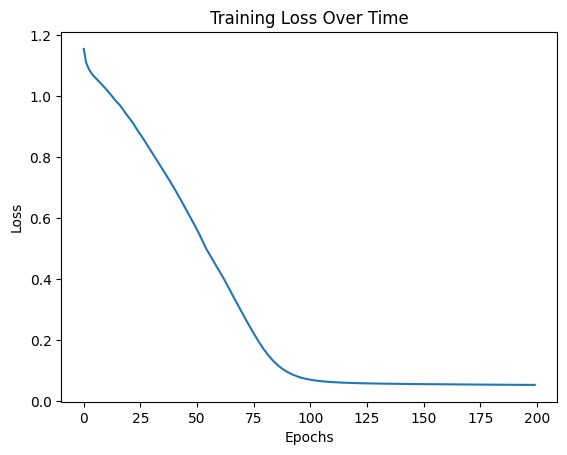

In [49]:
import sys
if 'matplotlib.pyplot' in sys.modules:
    del sys.modules['matplotlib.pyplot']
import matplotlib.pyplot as plt
# Graph the stuffs out
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Training Loss Over Time")
plt.show()

In [50]:
# Evaluate Model on Test Data Set
with torch.no_grad(): # It turns off the back propogation
  y_eval = model.forward(X_test) #X_test are features from our test set, y_eval will be the prediction.
  loss = criterion(y_eval, y_test) # Gives us the loss

In [51]:
loss

tensor(0.0365)

In [52]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)


    if y_test[i] == 0:
      x = "Setosa"

    elif y_test[i] == 1:
      x = "Versicolor"

    else:
      x = "Virginica"


    # Will reveal the type of flower our network thinks it is.
    # Change y_test[i] to x if you want.
    print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")


    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"We got {correct} correct")

1.) tensor([-2.3778,  7.4780,  1.3514]) 	 1 	 1
2.) tensor([ 20.9039,  12.6160, -19.8375]) 	 0 	 0
3.) tensor([-15.9239,   0.9121,  15.6787]) 	 2 	 2
4.) tensor([-3.2113,  6.9037,  2.2800]) 	 1 	 1
5.) tensor([-3.1587,  7.7674,  2.0742]) 	 1 	 1
6.) tensor([ 19.2288,  11.8119, -18.2684]) 	 0 	 0
7.) tensor([ 1.7557,  8.4492, -2.6303]) 	 1 	 1
8.) tensor([-9.2850,  4.5256,  8.6975]) 	 2 	 2
9.) tensor([-5.5455,  5.5595,  4.7978]) 	 1 	 1
10.) tensor([ 0.5553,  8.3432, -1.5715]) 	 1 	 1
11.) tensor([-7.4940,  5.1651,  6.8184]) 	 2 	 2
12.) tensor([ 19.3213,  11.0857, -18.2405]) 	 0 	 0
13.) tensor([ 22.0289,  12.4969, -20.7948]) 	 0 	 0
14.) tensor([ 19.3746,  11.2410, -18.3093]) 	 0 	 0
15.) tensor([ 20.9655,  12.0362, -19.8083]) 	 0 	 0
16.) tensor([-2.8757,  7.5590,  1.8464]) 	 1 	 1
17.) tensor([-12.0277,   2.3736,  11.7116]) 	 2 	 2
18.) tensor([ 0.1785,  7.9947, -1.1929]) 	 1 	 1
19.) tensor([-2.6909,  6.8598,  1.7689]) 	 1 	 1
20.) tensor([-11.9121,   2.2204,  11.6142]) 	 2 	 2
21

In [53]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [54]:
# Loading the Model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [55]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)